# Week6 Lab

## Download & Extract Data

Programmatically download the zip file & extract

In [7]:
from zipfile import ZipFile

In [8]:
from urllib import request

def download_file(file_name, url):
    res = request.urlopen(url)
    with open(file_name,'wb') as file:
        file.write(res.read())

In [9]:
file_url = 'https://github.com/msaricaumbc/DS_data/blob/master/lab_data.zip?raw=true'
file_name = 'lab_data.zip'

download_file(file_name, file_url)

In [10]:
def unzip(file_name, path='./'):
    # opening the zip file in READ mode 
    with ZipFile(file_name, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 

        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall(path = path) 
        print('Done!') 

In [11]:
unzip(file_name)

File Name                                             Modified             Size
PoliceShootingsUS.csv                          2021-09-21 20:53:54       227653
__MACOSX/._PoliceShootingsUS.csv               2021-09-21 20:53:54          276
volunteers.txt                                 2021-10-06 00:32:28         7015
__MACOSX/._volunteers.txt                      2021-10-06 00:32:28          176
Extracting all the files now...
Done!


## Reading data from a csv file

For the file `PoliceShootingsUS.csv`, please answer the following questions:

* How many offenders are older than 55? 

In [28]:
import pandas as pd
police = pd.read_csv('PoliceShootingsUS.csv',encoding='cp1252')
police

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [27]:
## Your code is here
police[police.age > 55].age.sum()

14755.0

* What's the age distribution?

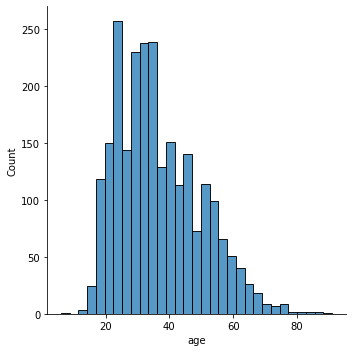

In [61]:
## Your code is here
import seaborn as sns
sns.displot(data = police, x="age", kind = 'hist')

## Dirty data

Read `volunteers.txt` file and perform the following action:

* Create a dataframe with columns: Name, Lastname, State

In [60]:
## Your code is here
df_result = pd.DataFrame(columns=('Name', 'Lastname', 'State'))
dictionary = {"Name":[],"Lastname":[],"State":[]}
with open('volunteers.txt', 'r') as file:
    while(True):
        line = file.readline()
        if not line:
            break
        dictionary["Name"].append(line.split(' ')[0][6:-1])
        dictionary["Lastname"].append(line.split(' ')[1][:-1])
        if(line.split(' ')[2][-1] == ")"):
            dictionary["State"].append(line.split(' ')[2][1:-1])
        else:
            dictionary["State"].append(line.split(' ')[2][1:] + " " + line.split(' ')[3][:-1])

volunteer = pd.DataFrame.from_dict(dictionary)
volunteer

,Name,Lastname,State
0,Harding,Christine,Virginia
1,Davis,Kimberly,New York
2,Ingram,Rachel,Louisiana
3,Walker,Richard,Oregon
4,Barnes,Francisco,Virginia
...,...,...,...
95,Smith,Kevin,North Dakota
96,Moore,Mark,Alaska
97,Landry,Jennifer,Wyoming
98,Phillips,Lori,Arkansas
